MovieWriter ffmpeg unavailable; using Pillow instead.


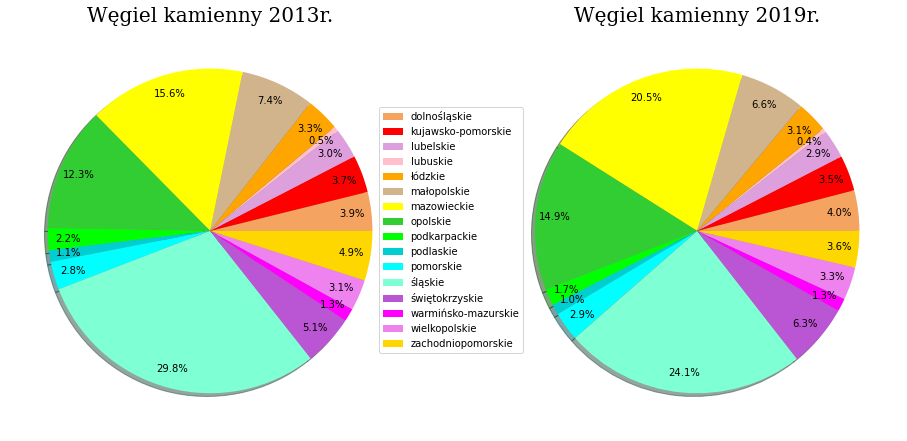

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation

cieplo_2013 = pd.read_excel('Zużycie ciepła_2013.xlsx',skiprows=range(2,8))
del cieplo_2013["Zużycie ciepła_2013"]

cieplo_2019 = pd.read_excel('Zużycie ciepła_2019.xlsx',skiprows=range(2,8))
del cieplo_2019["Zużycie ciepła_2019"]

c_o_o_2013 = pd.read_excel('Zużycie ciężkiego oleju opałowego_2013.xlsx',skiprows=range(2,8))
del c_o_o_2013["Zużycie ciężkiego oleju opałowego_2013"]

c_o_o_2019 = pd.read_excel('Zużycie ciężkiego oleju opałowego_2019.xlsx',skiprows=range(2,8))
del c_o_o_2019["Zużycie ciężkiego oleju opałowego_2019"]

energia_ele_2013 = pd.read_excel('Zużycie energii elektrycznej_2013.xlsx',skiprows=range(2,12))
del energia_ele_2013["Zużycie energii elektrycznej_2013"]

energia_ele_2019 = pd.read_excel('Zużycie energii elektrycznej_2019.xlsx',skiprows=range(2,12))
del energia_ele_2019["Zużycie energii elektrycznej_2019"]

gaz_ciekly_2013 = pd.read_excel('Zużycie gazu ciekłego_2013.xlsx',skiprows=range(2,7))
del gaz_ciekly_2013["Zużycie gazu ciekłego_2013"]

gaz_ciekly_2019 = pd.read_excel('Zużycie gazu ciekłego_2019.xlsx',skiprows=range(2,7))
del gaz_ciekly_2019["Zużycie gazu ciekłego_2019"]

gaz_ziemny_2013 = pd.read_excel('Zużycie gazu ziemnego_2013.xlsx',skiprows=range(2,12))
del gaz_ziemny_2013["Zużycie gazu ziemnego_2013"]

gaz_ziemny_2019 = pd.read_excel('Zużycie gazu ziemnego_2019.xlsx',skiprows=range(2,12))
del gaz_ziemny_2019["Zużycie gazu ziemnego_2019"]

l_o_o_2013 = pd.read_excel('Zużycie lekkiego oleju opałowego_2013.xlsx',skiprows=range(2,10))
del l_o_o_2013["Zużycie lekkiego oleju opałowego_2013"]

l_o_o_2019 = pd.read_excel('Zużycie lekkiego oleju opałowego_2019.xlsx',skiprows=range(2,10))
del l_o_o_2019["Zużycie lekkiego oleju opałowego_2019"]

wegiel_kam_2013 = pd.read_excel('Zużycie węgla kamiennego_2013.xlsx',skiprows=range(2,12))
del wegiel_kam_2013["Zużycie węgla kamiennego_2013"]

wegiel_kam_2019 = pd.read_excel('Zużycie węgla kamiennego_2019.xlsx',skiprows=range(2,12))
del wegiel_kam_2019["Zużycie węgla kamiennego_2019 "]

def funkcja(df):
    lista=[]
    for i in range(len(df.columns)-1):
        lista.append(df.values[0][i]/df.values[0][16])
    return lista

lista_2013=[]
lista_2019=[]

lista_2013.append(funkcja(cieplo_2013))
lista_2013.append(funkcja(c_o_o_2013))
lista_2013.append(funkcja(energia_ele_2013))
lista_2013.append(funkcja(gaz_ciekly_2013))
lista_2013.append(funkcja(gaz_ziemny_2013))
lista_2013.append(funkcja(l_o_o_2013))
lista_2013.append(funkcja(wegiel_kam_2013))

lista_2019.append(funkcja(cieplo_2019))
lista_2019.append(funkcja(c_o_o_2019))
lista_2019.append(funkcja(energia_ele_2019))
lista_2019.append(funkcja(gaz_ciekly_2019))
lista_2019.append(funkcja(gaz_ziemny_2019))
lista_2019.append(funkcja(l_o_o_2019))
lista_2019.append(funkcja(wegiel_kam_2019))

tytul = {'family':'serif','color':'black','size':20}

fig , axes = plt.subplots(1,2,figsize=(16,9))

def animuj(i,lista_2013,lista_2019):
    axes[0].clear()
    axes[1].clear()
    wojewodztwa = ['dolnośląskie','kujawsko-pomorskie','lubelskie','lubuskie','łódzkie','małopolskie','mazowieckie','opolskie','podkarpackie','podlaskie','pomorskie','śląskie','świętokrzyskie','warmińsko-mazurskie','wielkopolskie','zachodniopomorskie']
    paliwa = ['Ciepło', 'Cięzki olej opałowy','Energia elektryczna','Gaz ciekły','Gaz ziemny','Lekki olej opałowy','Węgiel kamienny']
    c=['sandybrown','red','plum','pink','orange','tan','yellow','limegreen','lime','darkturquoise','cyan','aquamarine','mediumorchid','magenta','violet','gold']
    axes[0].pie(lista_2013[i],labels=wojewodztwa,colors=c,autopct='%1.1f%%',pctdistance=0.88,shadow=True,frame=False,labeldistance=None,normalize=True)
    axes[1].pie(lista_2019[i],labels=wojewodztwa,colors=c,autopct='%1.1f%%',pctdistance=0.88,shadow=True,frame=False,labeldistance=None,normalize=True)
    axes[0].set_title(str(paliwa[i]) + " 2013r.",tytul)
    axes[1].set_title(str(paliwa[i]) + " 2019r.",tytul)
    plt.legend(loc=(-0.285,0.2))
    
anim = FuncAnimation(fig, animuj, fargs=(list(lista_2013),list(lista_2019)),frames=7,interval=10000)
anim.save('Zużycie_paliw_2013_2019_woj_pr.gif')
